In [5]:
import warnings
warnings.filterwarnings("ignore")


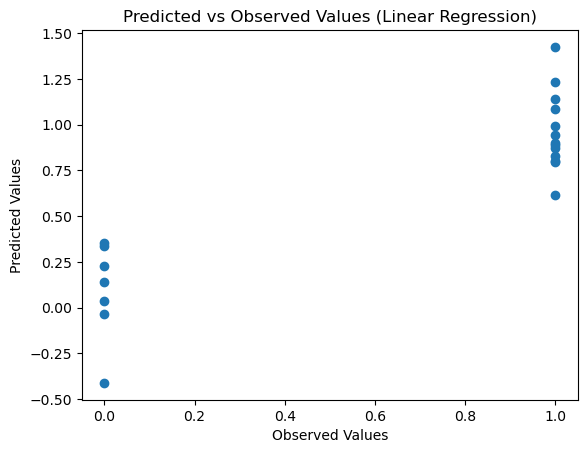

Best Linear Regression MSE: 0.05207014552743815


In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('../data/toy_data.csv')

# Split the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()

# Randomized Parameter Search
param_dist = {
    'fit_intercept': [True, False]
}

# Perform random search and cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

# Scatter plot of predicted vs observed values
plt.scatter(y_test, predictions)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values (Linear Regression)')
plt.show()

# Mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Best Linear Regression MSE: {mse}")

